# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math

#Grade 8 Math Scores 
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [4]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [21]:
#Changing the names to make it easier
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'ENROLL_ALL':'ALL_STUDENTS',
    'ENROLL_ALL_EST':'US_COUNT_STUDENTS'
    },
    axis=1,inplace=True)

#Since I'm only interested in AVG MATH 8, I wanna drop all data NAN in MATH 8
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df["AVG_MATH_8_SCORE"].isna().sum()

#Cleans up the data in which there's a descrepency between ALL students and US Census Students
df["US_COUNT_STUDENTS"] = df["US_COUNT_STUDENTS"].fillna(df["ALL_STUDENTS"])


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG MATH 8*

How many years of data are logged in our dataset? 

In [25]:
#shows the unique years across the data set

df["YEAR"].unique()
#[1992, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 1990, 2017, 1996, 2019]


df["YEAR"].nunique()
#13 different unique years ranging from 1990 - 2019

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [55]:
#sets the first index to state for comparasion 
df_ = df.set_index('STATE')

#uses loc to find out the scores of AVG_MATH_8_SCORE across all years for Michigan and Ohio and creates a mean for them 
print("Michigan : ", df_.loc['MICHIGAN']['AVG_MATH_8_SCORE'].mean())
print("Ohio : ", df_.loc['OHIO']['AVG_MATH_8_SCORE'].mean())

#creates and if statements for whichever one has the higher average outcome score
if df_.loc['OHIO']['AVG_MATH_8_SCORE'].mean() > df_.loc['MICHIGAN']['AVG_MATH_8_SCORE'].mean():
    print("Ohio has the higher MATH GRADE 8 score")
else: 
    print("Michigan has the higher MATH GRADE 8 score")




Michigan :  276.1666666666667
Ohio :  282.25
Ohio has the higher MATH GRADE 8 score


Find the average for your outcome score across all states in 2019

In [33]:
states = df.groupby("STATE")

#Data across all states with mean of the AVG MATH 8 SCORE 
states["AVG_MATH_8_SCORE"].mean().mean()

278.5171248039172

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [56]:
states["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [61]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ALL_STUDENTS']

#a states total ependiture per student may also affect their academic performance 
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ALL_STUDENTS']

#How much of the revenue is used for ependitures for a student to see if the state is using the money accordingly 
df['PERCENTAGE_OF_EPENDITURES_OFF_REVENUE'] = df['TOTAL_EXPENDITURE'] / df['TOTAL_REVENUE']

df.head()

,PRIMARY_KEY,STATE,YEAR,US_COUNT_STUDENTS,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_PRIMARY,ENROLL_HS,ALL_STUDENTS,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,EXPENDITURE_PER_STUDENT,PERCENTAGE_OF_EPENDITURES_OFF_REVENUE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,1.004650,3.627221,0.990635
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,1.496312,5.050774,1.044045
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,1.095128,3.948044,1.018145
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,1.621537,5.164536,1.033466
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,1.691007,5.329154,1.025007


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='AVG_MATH_8_SCORE', ylabel='AVG_READING_8_SCORE'>

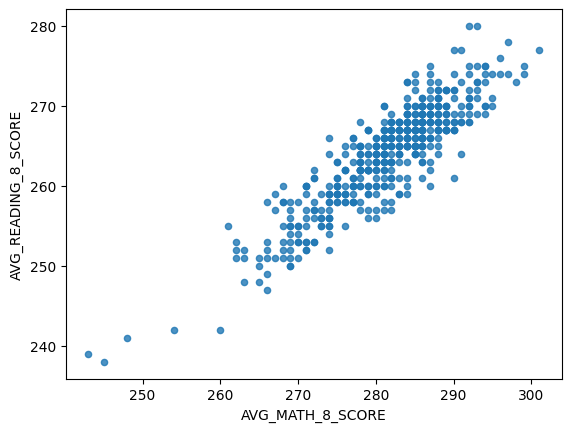

In [62]:
df.plot.scatter(x='AVG_MATH_8_SCORE', y='AVG_READING_8_SCORE', alpha=0.8)

**<CAPTION FOR VIZ 1>**

#Comparasion between AVG MATH 8 SCORE and AVG READING 8 SCORE, there's a very strong correlation between each of the variables, the higher the math score, the higher the reading score

**Visualization 2**

<Axes: xlabel='AVG_MATH_8_SCORE', ylabel='EXPENDITURE_PER_STUDENT'>

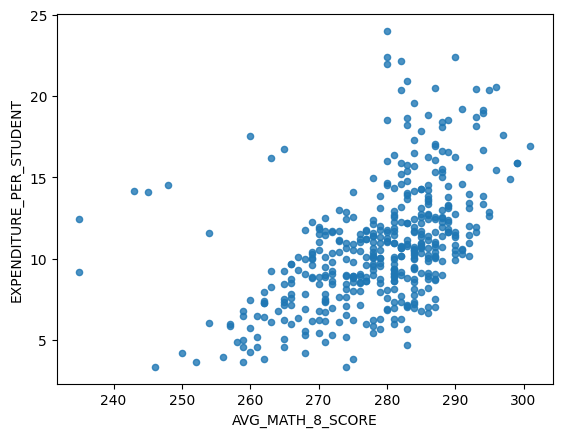

In [63]:
df.plot.scatter(x='AVG_MATH_8_SCORE', y='EXPENDITURE_PER_STUDENT', alpha=0.8)

**<CAPTION FOR VIZ 2>**

#Comparasion beteween AVG MATH 8 SCORE and EXPENDITURE PER STUDENT, there shows a slight correlation, but not as strong as the previous graph, it slightly shows that as the expenditure per student increases, the math 8 score increases. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [99]:
from sklearn.model_selection import train_test_split

In [112]:
X = df[['ENROLL_8','AVG_MATH_8_SCORE','EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['EXPENDITURE_PER_STUDENT']
y.fillna(y.median(), inplace=True)

In [113]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [114]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [115]:
# create your model here
# model = 
model = LinearRegression()

In [123]:
model.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [125]:
print(model.intercept_)
print(model.coef_)

model.score(X_test, y_test)

np.mean(model.predict(X_test)-y_test)

np.mean(np.abs(model.predict(X_test)-y_test))

np.mean((model.predict(X_test)-y_test)**2)**0.5

-1.4210854715202004e-14
[1.07058573e-21 8.32667268e-17 1.00000000e+00]


3.1105463389757255e-15

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

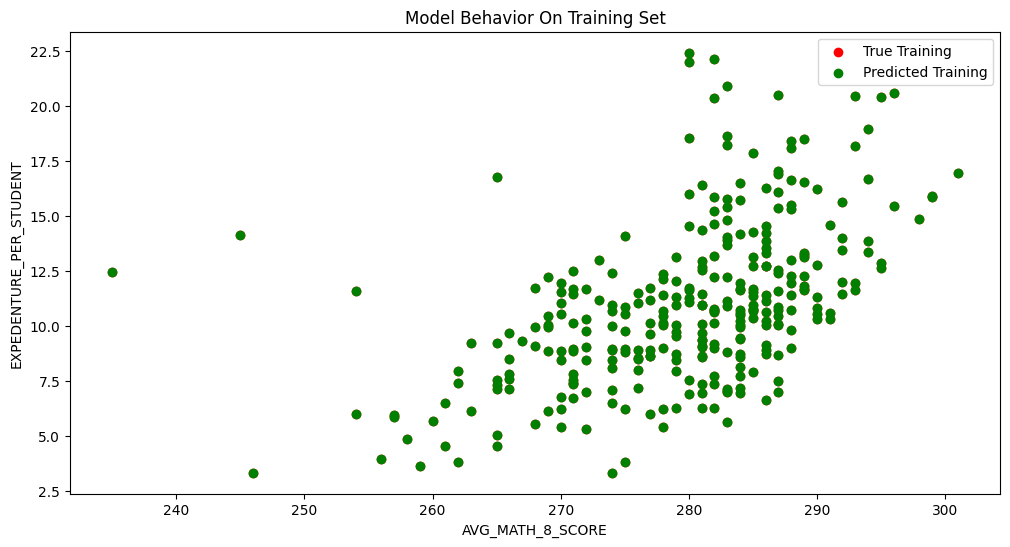

In [129]:
col = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col], y_train, color = "red")
plt.scatter(X_train[col], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col)
plt.ylabel('EXPEDENTURE_PER_STUDENT')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

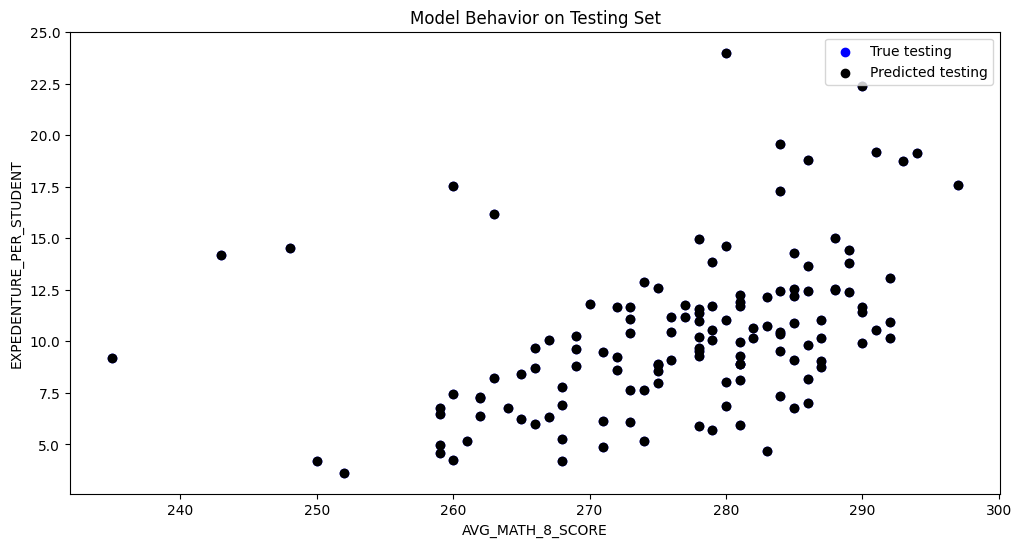

In [130]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('EXPEDENTURE_PER_STUDENT')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**


#For my work, I tried to see the relationship between Expenditure per student and how that affects the Avg Math 8 Scores, there was a slight correlation in which that the increase in expenditure per student, there's an increase in Avg Math 8 Score. My Model doesn't seem to work for the true testing, but the predicted testing looks reliable for both the Training set and the testing set. 